<a href="https://colab.research.google.com/github/Swamy612/Supervised-Learning/blob/main/LOGISTIC_REGRESSION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# data set - https://drive.google.com/file/d/1YptNOOqUIcZqyC_xOxb1tmzjco7d3cqS/view?usp=drive_link

In [ ]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, accuracy_score

# ignore harmless warnings
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# data import
data = pd.read_csv('/content/drive/MyDrive/diabetes (2).csv')

# data sample
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# data dimensions
data.shape

(768, 9)

In [ ]:
# data quality
pd.DataFrame({'datatype': data.dtypes,
              'missing_values': data.isnull().sum()})

,datatype,missing_values
Pregnancies,int64,0
Glucose,int64,0
BloodPressure,int64,0
SkinThickness,int64,0
Insulin,int64,0
BMI,float64,0
DiabetesPedigreeFunction,float64,0
Age,int64,0
Outcome,int64,0


In [ ]:
# data duplicated
data[data.duplicated].shape

(0, 9)

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
# preparing the data for ML model

# dependency split
x = data.iloc[:, :-1]
y = data['Outcome']

# train test split
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=42, test_size=0.2)

In [ ]:
# logistic regression model
logreg_model = LogisticRegression(random_state=42)
logreg_model.fit(x_train,y_train)
print('Training Score :',round(logreg_model.score(x_train,y_train)*100,2),'%')

Training Score : 77.04 %


Classification Report :               precision    recall  f1-score   support

           0       0.80      0.79      0.80        99
           1       0.63      0.65      0.64        55

    accuracy                           0.74       154
   macro avg       0.72      0.72      0.72       154
weighted avg       0.74      0.74      0.74       154



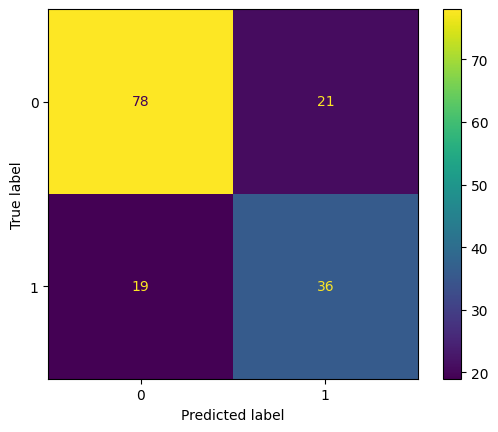

In [ ]:
# model testing
y_pred = logreg_model.predict(x_test)
print('Classification Report :',classification_report(y_test,y_pred))
cm=ConfusionMatrixDisplay.from_predictions(y_test,y_pred)

In [ ]:
# import oversampler
from imblearn.over_sampling import SMOTE

# resample
smote = SMOTE(random_state=42)

# do sampling only for the training data
x_train_smote, y_train_smote = smote.fit_resample(x_train, y_train)

In [ ]:
# data distribution before smote
round(y_train.value_counts(normalize=True)*100, 2)

,proportion
Outcome,
0,65.31
1,34.69


In [ ]:
# data distribution after smote
round(y_train_smote.value_counts(normalize=True)*100, 2)

,proportion
Outcome,
0,50.0
1,50.0


In [ ]:
# logistic regression model
logreg_model_sm = LogisticRegression(random_state=42)
logreg_model_sm.fit(x_train_smote,y_train_smote)
print('Training Score :',round(logreg_model_sm.score(x_train_smote,y_train_smote)*100,2),'%')

Training Score : 75.81 %


Classification Report:

               precision    recall  f1-score   support

           0       0.83      0.69      0.75        99
           1       0.57      0.75      0.65        55

    accuracy                           0.71       154
   macro avg       0.70      0.72      0.70       154
weighted avg       0.74      0.71      0.71       154



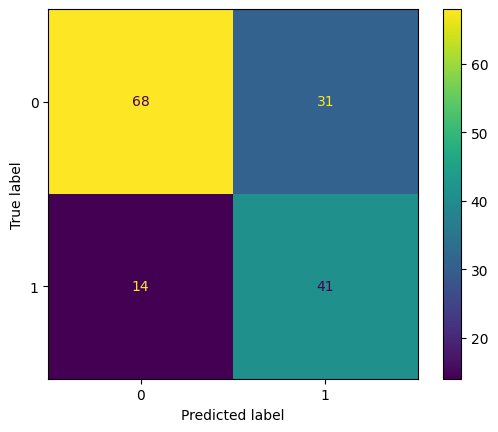

In [ ]:
# model testing
y_pred_sm = logreg_model_sm.predict(x_test)

# metrics
print('Classification Report:\n\n', classification_report(y_test, y_pred_sm))
cm = ConfusionMatrixDisplay.from_predictions(y_test, y_pred_sm)

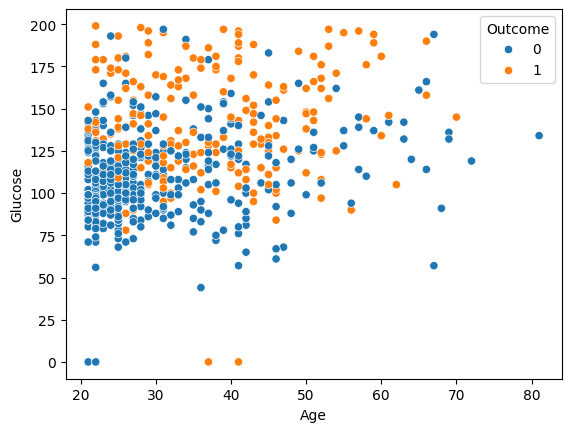

In [ ]:
# scatter plot for age vs glucose in raw train data with target as hue
sns.scatterplot(x=x_train['Age'],
                y=x_train['Glucose'],
                hue=y_train)
plt.show()

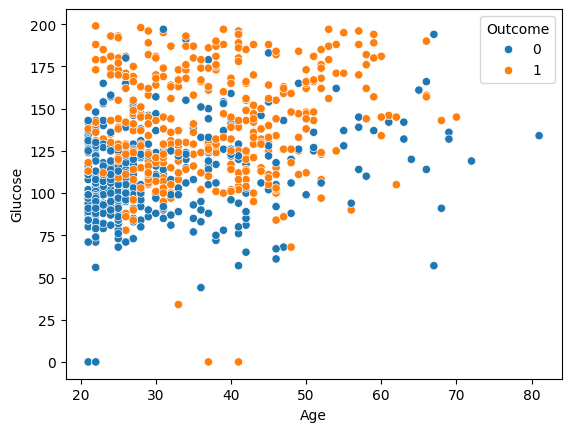

In [ ]:
# scatter plot for age vs glucose in smote train data with target as hue
sns.scatterplot(x=x_train_smote['Age'],
                y=x_train_smote['Glucose'],
                hue=y_train_smote)
plt.show()